
# Analysis Data PFT Pilots

In [30]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [31]:
def logisticplot_all (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    logit_all = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

   #fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data[xaxis][:, np.newaxis],
            data[yaxis])
    logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

    #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    all_coef = clf.coef_
    all_intercept = clf.intercept_
    
    #Plotting the predictive lines
    line_all = sub.plot(X_test, logit_all, color="#000000", linewidth=3, zorder=5,linestyle='-')

   # #Plotting the binned data
   # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
   # # determine the x coordinates
   # x_cords= data.groupby('DVBin2')[xaxis].mean()
    
   # # determine low y coordinates
   # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
   # # determine low y standard errors
   # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
   # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
   # # determine high y coordinates
   # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
   # # determine high y standard errors
   # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
   # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
   # # plot the low points
   # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
   # # plot low error bars
   # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
   # # plot the high points
   # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
   # # plot high error bars
   # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    sns.despine()

In [32]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

## Load data participants

In [33]:
data_exp1 = pd.read_csv('/Users/pradyumna/Documents/GiTs/PFT_fMRI_2019/Pilots/Data/All/PFT_Choice_Pilot_All.csv') 

In [34]:
# Insert to exclude particitipants
excludedPart = []
for i in excludedPart:
    data_exp1 = data_exp1[(data_exp1.Part != i)]
print (data_exp1["Part"].unique())
print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

[0 1]
Number of participants: 2


In [35]:
data_exp1.head()

trial  leftId  rightId  Frame   endTime  choice  choiceTime  LRat1  RRat1  \
0    0.0    21.0      4.0    2.0  7.508409     1.0    1.174838   50.0   28.5   
1    1.0    12.0     14.0    2.0  7.513930     1.0    0.780269   40.5   27.5   
2    2.0    20.0     19.0    2.0  7.515296     1.0    1.195317   50.0    8.0   
3    3.0     2.0      8.0    2.0  7.514498     1.0    0.247736   44.5   10.5   
4    4.0     4.0     21.0    1.0  7.514311     1.0    0.178482   28.5   50.0   

   LRat2  RRat2     LVar1     RVar1     LVar2      RVar2  Part  
0    1.5   20.5  0.000000  3.535534  0.707107   6.363961     0  
1   10.0   23.0  0.707107  2.121320  5.656854   4.242641     0  
2    1.0   41.0  0.000000  0.000000  0.000000  12.727922     0  
3    1.0   50.0  3.535534  3.535534  0.000000   0.000000     0  
4   20.5    1.5  3.535534  0.000000  6.363961   0.707107     0

In [36]:
data_exp1["TotVal"] = data_exp1['RRat1']+ data_exp1['LRat1']
data_exp1["DVal1"] = data_exp1['RRat1'] - data_exp1['LRat1']
data_exp1["absDVal1"] = np.abs(data_exp1["DVal1"] )


# add z-scores

In [37]:
data_exp1["zDVal1"] = z_score1(data_exp1,'Part',"DVal1")
data_exp1["zabsDVal1"] = z_score1(data_exp1,'Part',"absDVal1")
data_exp1["zTotVal"] = z_score1(data_exp1,'Part',"TotVal")


In [38]:
Correct = []
for i in range(len(data_exp1)):
    if data_exp1.Frame[i] == 1:
        if (data_exp1.choice[i] == 1 and (data_exp1.LRat1[i] < data_exp1.RRat1[i])) or (data_exp1.choice[i] == 0 and (data_exp1.LRat1[i] > data_exp1.RRat1[i])):
            Correct.append(1)
        else:
            Correct.append(0)
    if data_exp1.Frame[i] == 2:
        if (data_exp1.choice[i] == 1 and (data_exp1.LRat1[i] > data_exp1.RRat1[i])) or (data_exp1.choice[i] == 0 and (data_exp1.LRat1[i] < data_exp1.RRat1[i])):
            Correct.append(1)
        else:
            Correct.append(0)

data_exp1["correct"] = Correct

In [39]:
data_exp1.loc[data_exp1['Frame'] == 2].correct.mean()

0.3625

In [40]:
data_exp1.correct.mean()

0.3625

## drop NaNs from choice rows

In [41]:
data_exp1 = data_exp1.dropna(axis = 0, how ='any') 

In [42]:
data_exp1

trial  leftId  rightId  Frame   endTime  choice  choiceTime  LRat1  \
0      0.0    21.0      4.0    2.0  7.508409     1.0    1.174838   50.0   
1      1.0    12.0     14.0    2.0  7.513930     1.0    0.780269   40.5   
2      2.0    20.0     19.0    2.0  7.515296     1.0    1.195317   50.0   
3      3.0     2.0      8.0    2.0  7.514498     1.0    0.247736   44.5   
4      4.0     4.0     21.0    1.0  7.514311     1.0    0.178482   28.5   
5      5.0    12.0     20.0    1.0  7.513606    -1.0    2.181133   40.5   
6      6.0    24.0     21.0    2.0  7.514916     1.0    3.361822   50.0   
7      7.0     2.0     32.0    2.0  7.513895     1.0    2.000413   44.5   
8      8.0    19.0      8.0    1.0  7.514563     1.0    3.298472    8.0   
9      9.0    24.0     21.0    1.0  7.514475     1.0    1.482191   50.0   
10    10.0     7.0     24.0    2.0  7.533371    -1.0    3.472894   24.5   
11    11.0    19.0     20.0    2.0  7.513676    -1.0    2.680498    8.0   
13    13.0    11.0     13.0    1.0  7.514578    -1.0    1.246365   21.5   
14    14.0     2.0      8.0    1.0  7.515374    -1.0    0.698316   44.5   
15    15.0    25.0     14.0    1.0  7.513834     1.0    1.079885   18.0   
16    16.0    32.0      2.0    1.0  7.515025     1.0    0.749102   31.0   
17    17.0    21.0      4.0    1.0  7.514161    -1.0    0.398966   50.0   
18    18.0    14.0     12.0    2.0  7.514242    -1.0    2.078667   27.5   
19    19.0    18.0     27.0    1.0  7.514450     1.0    1.547261   50.0   
21    21.0    12.0     20.0    2.0  7.514755    -1.0    1.616939   40.5   
22    22.0     6.0      7.0    1.0  7.514262    -1.0    2.146601   25.5   
23    23.0    32.0      5.0    1.0  7.514405    -1.0    0.913481   31.0   
24    24.0    24.0      7.0    1.0  7.513696    -1.0    1.265961   50.0   
25    25.0     8.0      2.0    2.0  7.514479    -1.0    0.980972   10.5   
26    26.0    27.0     18.0    1.0  7.514286     1.0    1.595422   46.0   
27    27.0    20.0     12.0    2.0  7.514039    -1.0    1.414524   50.0   
28    28.0     4.0     21.0    2.0  7.513827    -1.0    0.532735   28.5   
29    29.0    18.0     25.0    1.0  7.514261    -1.0    1.414328   50.0   
30    30.0     7.0      6.0    1.0  7.514328    -1.0    0.748972   24.5   
31    31.0    32.0      2.0    2.0  7.514388     1.0    0.547924   31.0   
..     ...     ...      ...    ...       ...     ...         ...    ...   
128   48.0    16.0      8.0    2.0  7.514277     1.0    2.777255   39.5   
129   49.0     5.0     10.0    1.0  7.515118     1.0    2.059221    1.0   
130   50.0    19.0     24.0    2.0  7.514017    -1.0    2.027557   27.0   
131   51.0    11.0      8.0    2.0  7.514596    -1.0    2.542842   11.5   
132   52.0     4.0     10.0    1.0  7.514298     1.0    1.960847   38.5   
133   53.0    25.0     21.0    2.0  7.511031    -1.0    2.760285   34.0   
134   54.0    19.0     24.0    1.0  7.514092    -1.0    2.960713   27.0   
136   56.0    14.0     11.0    1.0  7.514857    -1.0    2.027261   32.5   
137   57.0     3.0     17.0    1.0  7.513879    -1.0    1.859810   32.0   
138   58.0    15.0     13.0    1.0  7.514414    -1.0    1.144094   34.5   
140   60.0    16.0      8.0    1.0  7.514473    -1.0    1.642197   39.5   
141   61.0     8.0     16.0    2.0  7.514280    -1.0    1.376965   35.5   
142   62.0     8.0     11.0    2.0  7.514345     1.0    0.826769   35.5   
143   63.0    15.0      2.0    2.0  7.514372    -1.0    1.427159   34.5   
144   64.0    24.0     19.0    2.0  7.514421    -1.0    1.393911   34.5   
145   65.0    14.0     21.0    1.0  7.514583     1.0    1.659333   32.5   
146   66.0    13.0     15.0    2.0  7.514525    -1.0    1.794243    3.5   
147   67.0    25.0      7.0    1.0  7.513974    -1.0    1.627891   34.0   
148   68.0    16.0     12.0    2.0  7.514388     1.0    1.875714   39.5   
149   69.0    21.0     25.0    2.0  7.514205     1.0    3.125397   42.0   
150   70.0     4.0     10.0    2.0  7.514465    -1.0    1.860499   38.5   
151   71.0    12.0     16.0   

In [47]:
data_expL = data_exp1.loc[data_exp1['Frame'] == 1] # 1 = Like, 2 = Dislike
data_expD = data_exp1.loc[data_exp1['Frame'] == 2] # 1 = Like, 2 = Dislike

NameError: name 'data_expD' is not defined

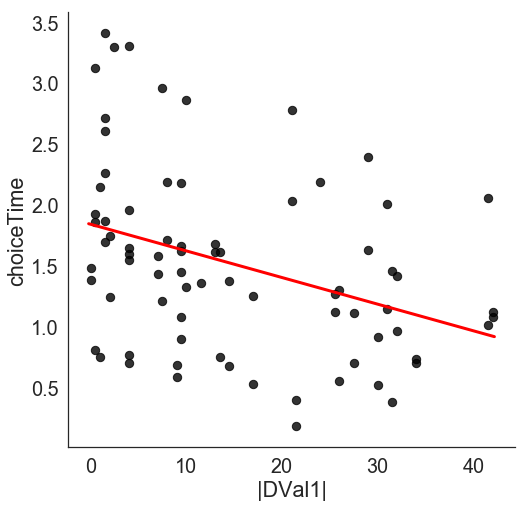

In [44]:
x_variable = 'absDVal1'
x_varlabel = '|DVal1|'
y_variable = 'choiceTime'
y_varlabel =  'choiceTime'

f = plt.figure(figsize=(8, 8))
sns.set(style='white', font_scale=1.8)
ax = sns.regplot(data=data_expL, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_expL[x_variable]
y=data_expL[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Red', lw=3)
sns.despine()

results = pearsonr(data_expL[x_variable], data_expD[y_variable])
print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
No handles with labels found to put in legend.


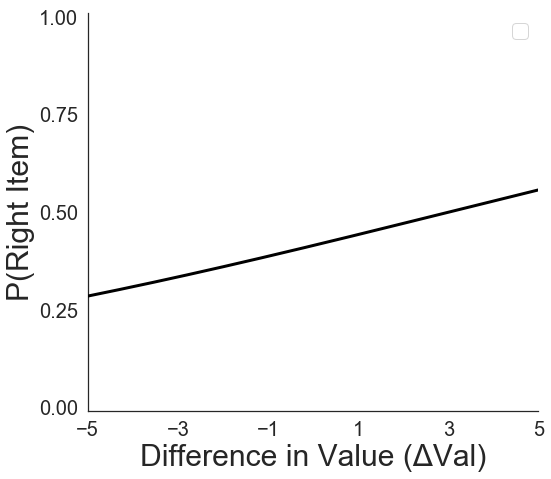

In [46]:
# Split by high/low conf
logisticplot_all( data=data_expL, xaxis='DVal1', yaxis='choice', ylab='P(Right Item)', xlab='Difference in Value (ΔVal)',
                 modlowcol='#B5C8E9', title='empty', parvar='Part')
plt.tight_layout()

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
No handles with labels found to put in legend.


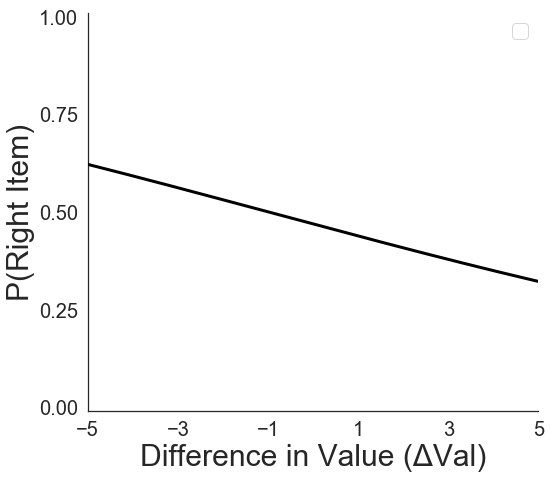

In [48]:
# Split by high/low conf
logisticplot_all( data=data_expD, xaxis='DVal1', yaxis='choice', ylab='P(Right Item)', xlab='Difference in Value (ΔVal)',
                 modlowcol='#B5C8E9', title='empty', parvar='Part')
plt.tight_layout()